In [1]:
from pylab import *
import joblib


import time
from importlib import reload
import sys
sys.path.append("..")


import helper_visa as vs
import config
reload(vs)


<module 'helper_visa' from '/home/mathusla/tofpet/Mu-Hardware/Keysight/../helper_visa.py'>

# Step 1: connect to the scope
- If you don't know the address, do vs.connect()
- Otherwise, put the address in the argument will speed it up

In [2]:
scope = vs.connect(address = "TCPIP0::192.168.1.23::inst0::INSTR", timeout=3_000) # set 30 second

Connected to VISA [TCPIP0::192.168.1.23::inst0::INSTR]:  KEYSIGHT TECHNOLOGIES,EXR054A,MY63160110,11.50.00201



## Step 2: set scan parameters

In [5]:
### Run name. This name will be used to save the results.
run_name = "staircase_SiPM1_41.0V"


### Parameter to scan
# Choose one of the following:
# {"trigger_level", ""}

par_scan = "trigger_level"
par_scan_list = np.linspace(0.0017, 0.03, 100)

### Parameter to measure
# Choose one of the followings:
# {"counter_freq"}

par_measure = "counter_freq"


### Measurement configuration
meas_source = 1   # Channel number
meas_counts = 10

In [6]:
results = vs.scope_scan(scope, par_scan, par_scan_list, par_measure, 
                     meas_source=meas_source, meas_counts=meas_counts,
                     debug=True)

data_save = {"par_scan_name": par_scan, "par_scan_list":par_scan_list, "par_measure_name":par_measure, "par_measure_list":results}
joblib.dump(data_save, config.scope+f"/scan/scan_{run_name}.joblib")


['/mnt/sda2//scope_data/scan_staircase_SiPM1_41.0V.joblib']

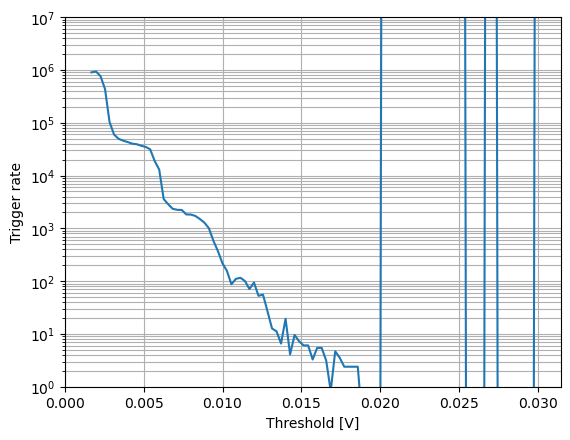

In [7]:
plot(par_scan_list, results)
yscale("log")
xlim(0,)
ylim(1,1e7)
grid(which="both")
xlabel("Threshold [V]")
ylabel("Trigger rate")
savefig(config.scope+f"/plots/{run_name}.jpg")